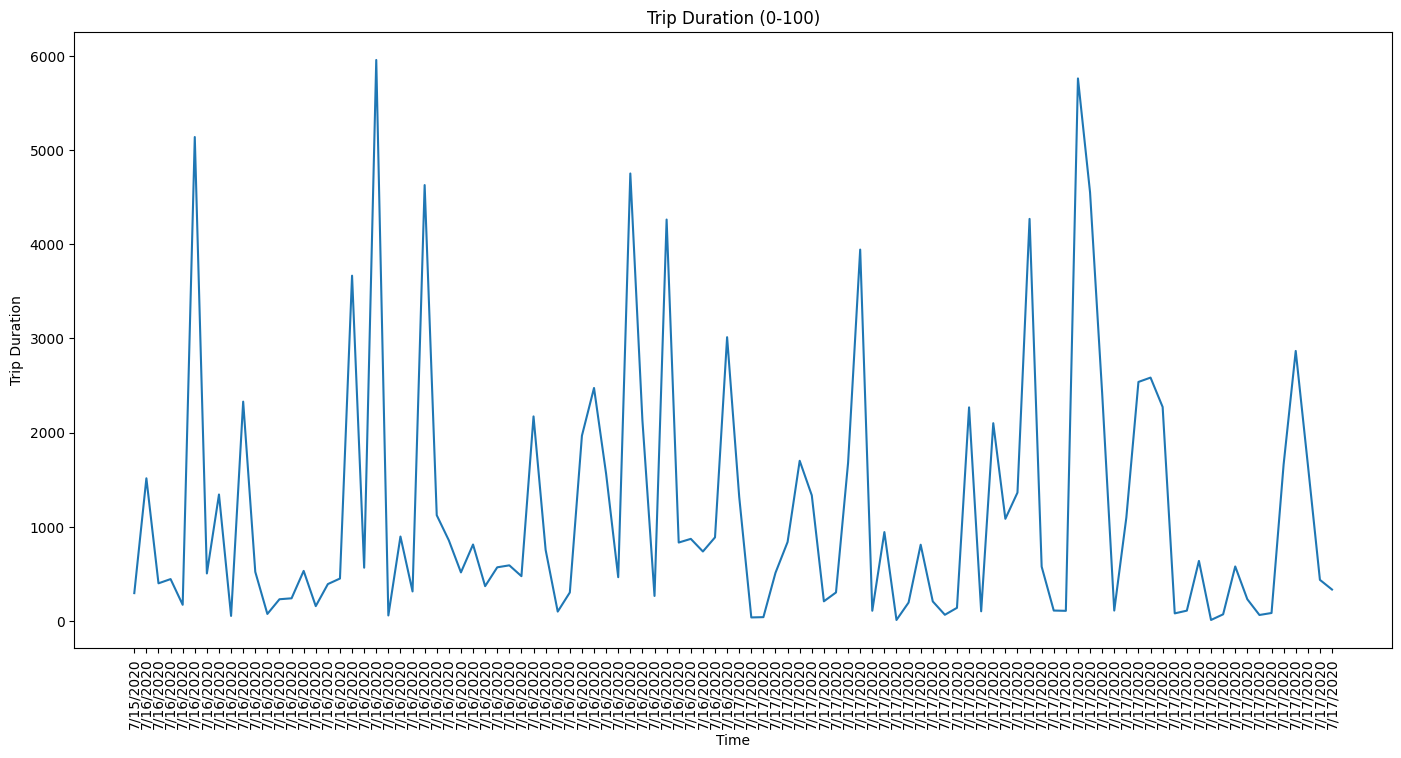

In [2]:
#regular graph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv')
#print(df)
#print(len(df))
rows = df.loc[range(100), 'TripDuration']
#print(rows)

date = []
for i in range(100):
    row = df.loc[i, 'StartTime']
    split = row.split(' ' ,1)
    #print(split[0])
    date.append(split[0])
#print(date)

x = range(len(rows))
y = rows 
plt.figure(figsize=(17, 8))
plt.plot(x, y)
plt.title('Trip Duration (0-100)')
plt.xlabel('Time')
plt.ylabel('Trip Duration')
ax = plt.subplot()
ax.set_xticks(range(len(rows)))
ax.set_xticklabels(date)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#open new window
%matplotlib qt

In [ ]:
#hover thing
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

df = pd.read_csv("Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv")
rows = df.loc[range(100), 'TripDuration']
date = [df.loc[i, 'StartTime'].split(' ', 1)[0] for i in range(100)]

x = range(len(rows))
y = rows
plt.figure(figsize=(17, 8))
plt.plot(x, y, marker='o', linestyle='-', label='Trip Duration')
plt.title('Trip Duration (0-100)')
plt.xlabel('Time')
plt.ylabel('Trip Duration')
ax = plt.gca()
ax.set_xticks(range(len(rows)))
ax.set_xticklabels(date, rotation=90)

#add something so when a cursor hovers over the point, the actual date and correlated duration pop up
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Date: {date[sel.index]}\nDuration: {y.iloc[sel.index]}"))

plt.show()


In [ ]:
#slider (not right)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

df = pd.read_csv('Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv')
rows = df.loc[:500, 'TripDuration']  
dates = pd.to_datetime(df.loc[:500, 'StartTime']).dt.date 


fig, ax = plt.subplots(figsize=(17, 8))
plt.subplots_adjust(bottom=0.25)  #slider space

start_index = 0
window_size = 50  #points visible
x = range(window_size)
y = rows[start_index:start_index + window_size]
date_labels = dates[start_index:start_index + window_size]

line, = ax.plot(x, y, marker='o', linestyle='-')
ax.set_title('Trip Duration w/ Slider')
ax.set_xlabel('Date')
ax.set_ylabel('Trip Duration')

ax.set_xticks(range(len(date_labels)))
ax.set_xticklabels(date_labels, rotation=45)

ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03])  #slider position
slider = Slider(ax_slider, 'Start Index', 0, len(rows) - window_size, valinit=0, valstep=1)

def update(val):
    start_index = int(slider.val)
    x = range(window_size)
    y = rows[start_index:start_index + window_size]
    date_labels = dates[start_index:start_index + window_size]

    line.set_ydata(y)
    ax.set_xticks(range(len(date_labels)))
    ax.set_xticklabels(date_labels, rotation=45)
    fig.canvas.draw_idle()
slider.on_changed(update)
plt.show()

/var/folders/sd/84ff65hx4d5cnfcytc17qp_r0000gn/T/ipykernel_18050/1952929651.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartTime'] = pd.to_datetime(df['StartTime'])


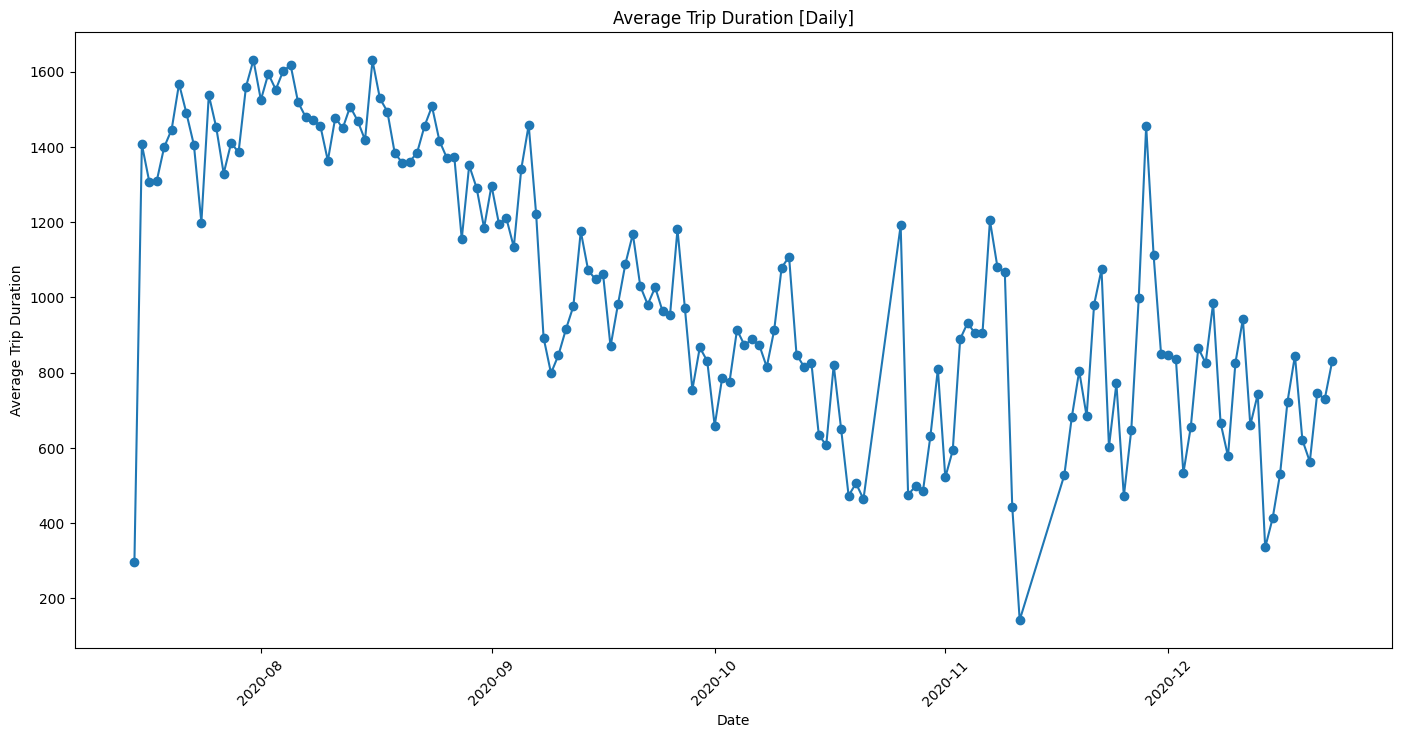

In [1]:
#sort by date
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv')
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['Date'] = df['StartTime'].dt.date  #just date

avg_trip_duration = df.groupby('Date')['TripDuration'].mean().reset_index()

plt.figure(figsize=(17, 8))
plt.plot(avg_trip_duration['Date'], avg_trip_duration['TripDuration'], marker='o', linestyle='-')
plt.title('Average Trip Duration [Daily]')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#hourly, monthly, daily averages with like a button choice thing
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

df = pd.read_csv('Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv')
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['Date'] = df['StartTime'].dt.date  
df['Hour'] = df['StartTime'].dt.hour 
df['Month'] = df['StartTime'].dt.to_period('M') 

fig, ax = plt.subplots(figsize=(17, 8))
plt.subplots_adjust(left=0.2)  
grouping = 'Date'

def update_plot(grouping):
    ax.clear()

    if grouping == 'Hourly':
        grouped_data = df.groupby('Hour')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Hour']
        xlabel = 'Hour of Day'
    elif grouping == 'Monthly':
        grouped_data = df.groupby('Month')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Month'].astype(str) 
        xlabel = 'Month'
    else: 
        grouped_data = df.groupby('Date')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Date']
        xlabel = 'Date'

    ax.plot(x_values, grouped_data['TripDuration'], marker='o', linestyle='-')
    ax.set_title(f'Average Trip Duration - {grouping} View')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Average Trip Duration')
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=45) 
    fig.canvas.draw_idle()
update_plot(grouping)

ax_radio = plt.axes([0.02, 0.4, 0.15, 0.3])  
radio = RadioButtons(ax_radio, ('Daily', 'Hourly', 'Monthly'))
def radio_click(label):
    update_plot(label)
radio.on_clicked(radio_click)

plt.show()

In [1]:
#open new window
%matplotlib qt 

In [2]:
#slider + hourly, monthly, daily averages with like a button choice thing
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons, Slider

df = pd.read_csv('Motorized_Foot_Scooter_Trips_2020_-3349034041307982662.csv')
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['Date'] = df['StartTime'].dt.date 
df['Hour'] = df['StartTime'].dt.hour 
df['Month'] = df['StartTime'].dt.to_period('M')  
fig, ax = plt.subplots(figsize=(17, 8))
plt.subplots_adjust(left=0.2, bottom=0.2)  

grouping = 'Date'
num_points = 10 

def update_plot(grouping, num_points):
    ax.clear() 
    if grouping == 'Hourly':
        grouped_data = df.groupby('Hour')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Hour']
        xlabel = 'Hour of Day'
    elif grouping == 'Monthly':
        grouped_data = df.groupby('Month')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Month'].astype(str)
        xlabel = 'Month'
    else:
        grouped_data = df.groupby('Date')['TripDuration'].mean().reset_index()
        x_values = grouped_data['Date']
        xlabel = 'Date'

    grouped_data = grouped_data.iloc[:num_points]
    x_values = x_values[:num_points]

    ax.plot(x_values, grouped_data['TripDuration'], marker='o', linestyle='-')
    ax.set_title(f'Average Trip Duration - {grouping}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Average Trip Duration')
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=45)
    fig.canvas.draw_idle()

update_plot(grouping, num_points)

ax_radio = plt.axes([0.02, 0.5, 0.15, 0.3])  #button position
radio = RadioButtons(ax_radio, ('Daily', 'Hourly', 'Monthly'))

def radio_click(label):
    global grouping
    grouping = label
    update_plot(grouping, int(slider.val))
radio.on_clicked(radio_click)

ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, 'Num Points', 0, 100, valinit=num_points, valstep=1)

def slider_update(val):
    update_plot(grouping, int(val))
slider.on_changed(slider_update)

plt.show()

/var/folders/sd/84ff65hx4d5cnfcytc17qp_r0000gn/T/ipykernel_1042/2065343329.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartTime'] = pd.to_datetime(df['StartTime'])
